<a href="https://colab.research.google.com/github/alexandragrecu/fake-news-detection-system/blob/main/Fake_News_Detection_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project 10: Fake news detection, rumor detection, propaganda detection

## 📖 Background
Fake news can originate from any number of sources and is shared across different platforms. One of the hallmarks of fake news is that the content looks as though it’s produced by reliable news outlets. Other forms of misinformation—such as deepfakes,3 biased reporting, and selectively quoting sources—add to the confusion, making it increasingly difficult for news consumers to determine what is true.

We are trying to create a fake news detection model that we can evaluate at the end.

## 💾 The data
This dataset contains 30 MB of fake news articles and it is avalable [here](https://github.com/alexandragrecu/fake-news-detection-system/blob/main/fake_or_real_news.csv).

This file contains a description of each article as follows: 
- article title
- the content of the article
- label

With this data, we will try to correctly interpret the if an article is fake or not.

## 📌 Problem statement

Our goal for this project is to create a model that classifies articles as correctly as possible (fake or real).

Through data cleaning, analysis and visualization we will try to understand our model, to improve it and to make conclusions.

## 📚 Load packages
 
Let's start by loading all the necessary Python packages.

In [103]:
# Import necessary libraries
import pandas as pd
import io
import re
import numpy as np
from google.colab import files
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import matplotlib.pyplot as plt
import itertools
import seaborn as sns
from sklearn.metrics import confusion_matrix

## 🗓 Load dataframes
We will load the available dataset.

In [2]:
from google.colab import files
uploaded = files.upload()

Saving fake_or_real_news.csv to fake_or_real_news (2).csv


In [3]:
df2 = pd.read_csv(io.BytesIO(uploaded['fake_or_real_news.csv']))
# Dataset is now stored in a Pandas Dataframe

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Let's have a look at our dataset:

In [126]:
df2.head()

,Unnamed: 0,title,text,label,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,...,Unnamed: 101,Unnamed: 102,Unnamed: 103,Unnamed: 104,Unnamed: 105,Unnamed: 106,Unnamed: 107,Unnamed: 108,Unnamed: 109,Unnamed: 110,Unnamed: 111,Unnamed: 112,Unnamed: 113,Unnamed: 114,Unnamed: 115,Unnamed: 116,Unnamed: 117,Unnamed: 118,Unnamed: 119,Unnamed: 120,Unnamed: 121,Unnamed: 122,Unnamed: 123,Unnamed: 124,Unnamed: 125,Unnamed: 126,Unnamed: 127,Unnamed: 128,Unnamed: 129,Unnamed: 130,Unnamed: 131,Unnamed: 132,Unnamed: 133,Unnamed: 134,Unnamed: 135,Unnamed: 136,Unnamed: 137,Unnamed: 138,Unnamed: 139,Unnamed: 140
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
print(len(df2.index))

7794


## ✂️ Preprocessing steps


1. Eliminate rows with null entries (there are few cases with null entries, so we can do this operation)

In [6]:
df2 = df2.dropna(axis=0, subset=['title'])
df2 = df2.dropna(axis=0, subset=['text'])
df2 = df2.dropna(axis=0, subset=['label'])

# create a new data frame
df = df2[['title', 'text', 'label']].copy()

print(len(df.index))

6753


2. Remove from articles:
- hashtags, mentions, emojis
- punctuation


In [ ]:
'''
# hashtags and mentions regex
pattern1 = r'([@#]\w+)'

#punctuation
pattern2 = r'[^\w\s]'

#emoji regex
pattern3 = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags=re.UNICODE)
i = 0
for el in df["text"] : 
  el = re.sub(pattern1,'',el)
  el = re.sub(pattern2, '', el)
  el = pattern3.sub(r'', el)
  df["text"][i] = el
  i = i + 1
'''


In [7]:
df.head()

,title,text,label
0,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


## 🔥 Vectorization
- We will use 2 types of vectorization:
  - CountVectorizer
  - Tf-IDF

### 1. CountVectorizer

In [8]:
# store labels for our texts:
y = df["label"]
y

0       FAKE
1       FAKE
2       REAL
3       FAKE
4       REAL
        ... 
7789    REAL
7790    FAKE
7791    FAKE
7792    REAL
7793    REAL
Name: label, Length: 6753, dtype: object

In [9]:
# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(df["text"], y, test_size=0.2, random_state=42)

In [45]:
# Create a CountVectorizer instance + eliminate stop words for english language
count_vectorizer = CountVectorizer(stop_words="english", min_df = 15)

In [46]:
# Transform training data 
count_train = count_vectorizer.fit_transform(X_train.values)

In [47]:
# Transform the test data 
count_test = count_vectorizer.transform(X_test.values)

In [48]:
# Print the first 10 features of the count_vectorizer
print(count_vectorizer.get_feature_names()[:10])

['00', '000', '01', '02', '03', '05', '06', '07', '08', '09']


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [49]:
# Create a dataframe from CountVectorizer
count_df = pd.DataFrame(count_train.A, columns=count_vectorizer.get_feature_names())


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [50]:
print(count_df.head())

   00  000  01  02  03  05  ...  zealand  zero  zionist  zone  zones  zuckerberg
0   0    0   0   0   0   0  ...        0     0        0     0      0           0
1   0    0   0   0   0   0  ...        0     0        0     0      0           0
2   0    0   0   0   0   0  ...        0     0        0     0      0           0
3   0    0   0   0   0   0  ...        0     0        0     0      0           0
4   0    0   0   0   0   0  ...        0     0        0     0      0           0

[5 rows x 10883 columns]


### 2. Tf-IDF Vectorizer

In [32]:
# Create a TfidfVectorizer instance + eliminate stop words for english language
tfidf_vectorizer = TfidfVectorizer(stop_words="english", max_df=0.7, min_df=15)

In [33]:
# Transform the training data
tfidf_train = tfidf_vectorizer.fit_transform(X_train)

In [34]:
# Transform the test data:
tfidf_test = tfidf_vectorizer.transform(X_test)

In [35]:
# Print the first 10 features
print(tfidf_vectorizer.get_feature_names()[:10])

['00', '000', '01', '02', '03', '05', '06', '07', '08', '09']


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [36]:
# Create a dataframe
tfidf_df = pd.DataFrame(tfidf_train.A, columns=tfidf_vectorizer.get_feature_names())

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [37]:
# Print the head of tfidf_df
print(tfidf_df.head())

    00  000   01   02   03  ...  zero  zionist  zone  zones  zuckerberg
0  0.0  0.0  0.0  0.0  0.0  ...   0.0      0.0   0.0    0.0         0.0
1  0.0  0.0  0.0  0.0  0.0  ...   0.0      0.0   0.0    0.0         0.0
2  0.0  0.0  0.0  0.0  0.0  ...   0.0      0.0   0.0    0.0         0.0
3  0.0  0.0  0.0  0.0  0.0  ...   0.0      0.0   0.0    0.0         0.0
4  0.0  0.0  0.0  0.0  0.0  ...   0.0      0.0   0.0    0.0         0.0

[5 rows x 10883 columns]


## ✨1. Training and testing our model

### 🌟 We will use *Multinomial Naive Baise* classifier



### for countVectorizer:

In [68]:
# Create an instance of MultinomialNB
nb_classifier = MultinomialNB()

In [69]:
# Fit the classifier to the training data
nb_classifier.fit(count_train, y_train)

MultinomialNB()

In [70]:
# Create the predicted labels
predictions = nb_classifier.predict(count_test)

In [71]:
# Calculate performance metrics
score1 = metrics.accuracy_score(y_test, predictions)
print(score1)

0.8349370836417469


In [102]:
# Create the confusion matrix
c_matrix1 = metrics.confusion_matrix(y_test, predictions, labels=['FAKE', 'REAL'])
print(c_matrix1)

cm1 = confusion_matrix(y_test, predictions)

[[575  49]
 [ 47 590]]


### for Tf-Idf:

In [90]:
nb_classifier = MultinomialNB()

In [74]:
# Fit the classifier to the training data
nb_classifier.fit(tfidf_train, y_train)


MultinomialNB()

In [75]:
# Create the predicted labels
predictions = nb_classifier.predict(tfidf_test)

In [76]:
# Calculate performance metrics
score2 = metrics.accuracy_score(y_test, predictions)
print(score2)

0.843819393042191


In [101]:
# Calculate the confusion matrix
c_matrix2 = metrics.confusion_matrix(y_test, predictions, labels=['FAKE', 'REAL'])
print(c_matrix2)

cm2 = confusion_matrix(y_test, predictions)

[[575  49]
 [ 47 590]]


## ✨2. Training and testing our model

### 🌟 We will use *Logistic Regression* classifier

### for countVectorizer:



In [78]:
# Create an instance of LogisticRegression
lg_classifier = LogisticRegression()

In [ ]:
# Fit the classifier to the training data
lg_classifier.fit(count_train, y_train)

In [80]:
# Create the predicted labels
predictions = lg_classifier.predict(count_test)

In [81]:
# Calculate performance metrics
score3 = metrics.accuracy_score(y_test, predictions)
print(score3)

0.8549222797927462


In [100]:
# Calculate the confusion matrix
c_matrix3 = metrics.confusion_matrix(y_test, predictions, labels=['FAKE', 'REAL'])
print(c_matrix3)

cm3 = confusion_matrix(y_test, predictions)

[[575  49]
 [ 47 590]]


### for Tf-Idf:

In [83]:
# Create an instance of LogisticRegression
lg_classifier = LogisticRegression()

In [84]:
# Fit the classifier to the training data
lg_classifier.fit(tfidf_train, y_train)

LogisticRegression()

In [85]:
# Create the predicted labels
predictions = lg_classifier.predict(tfidf_test)

In [86]:
# Calculate performance metrics
score4 = metrics.accuracy_score(y_test, predictions)
print(score4)

0.8623242042931162


In [121]:
# Calculate the confusion matrix
c_matrix4 = metrics.confusion_matrix(y_test, predictions, labels=['FAKE', 'REAL'])
print(c_matrix4)

cm4 = confusion_matrix(y_test, predictions)


[[575  49]
 [ 47 590]]


## 👓 Viewing Results

In [112]:
def plot_confusion_matrix(cm,
                          title,
                          cmap):
   
  import seaborn as sns

  ax = sns.heatmap(cm, annot=True, cmap=cmap)

  ax.set_title(title + '\n\n');
  ax.set_xlabel('\nPredicted Values')
  ax.set_ylabel('Actual Values ');

  ## Ticket labels - List must be in alphabetical order
  ax.xaxis.set_ticklabels(['False','True'])
  ax.yaxis.set_ticklabels(['False','True'])

  ## Display the visualization of the Confusion Matrix.
  plt.show()

1. Naive Bayes classifier + Counter Vectorization
**Accuracy: 83.49%**

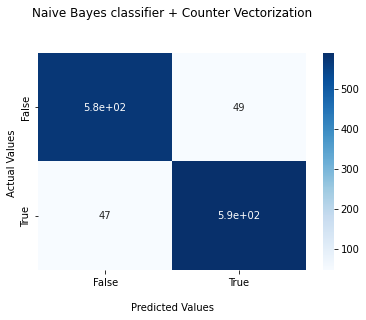

In [122]:
plot_confusion_matrix(c_matrix1, "Naive Bayes classifier + Counter Vectorization", 'Blues')

2. Naive Bayes classifier + Tf-Idf Vectorization
**Accuracy: 84.38%**

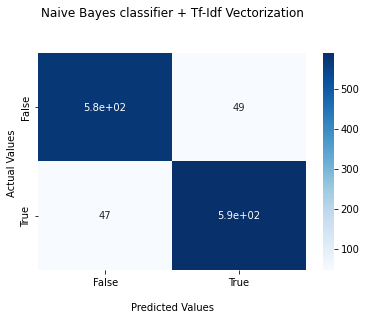

In [123]:
plot_confusion_matrix(c_matrix2, "Naive Bayes classifier + Tf-Idf Vectorization", 'Blues')

3. Logistic Regression classifier + Counter Vectorization
**Accuracy: 85.49%**

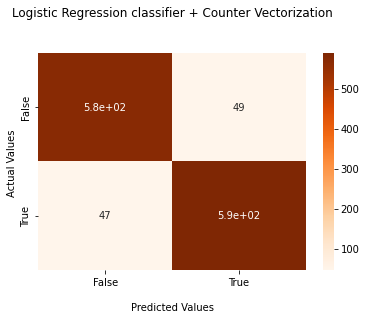

In [124]:
plot_confusion_matrix(c_matrix3, "Logistic Regression classifier + Counter Vectorization", 'Oranges')

4. Logistic Regression classifier + Tf-Idf Vectorization
**Accuracy: 86,23%**

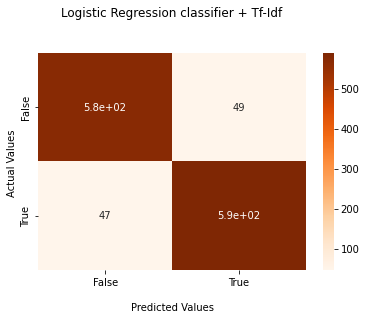

In [125]:
plot_confusion_matrix(c_matrix4, "Logistic Regression classifier + Tf-Idf", 'Oranges')